## Preprocessing

In [38]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [39]:
# Identify the target(s) for your model
target_columns = ['IS_SUCCESSFUL']


In [40]:
# Identify the feature(s) for your model
feature_columns = application_df.columns.difference(['EIN', 'NAME'] + target_columns)

In [41]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  # Drop the 'EIN' and 'NAME' columns
application_df.drop(columns=['EIN', 'NAME'], axis=1, inplace=True)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [42]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


Target variable = IS_SUCCESSFUL -- 1 is considered yes (successful) and 0 is considered no (not successful)

Features = there are 9 features - all the other columns

In [43]:
# Determine the number of unique values in each column
unique_counts = application_df.nunique()

# Display the number of unique values in each column
print(unique_counts)


APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [44]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
print(application_type_counts)


APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [45]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_value = 500

# Create a list of application types to be replaced
application_types_to_replace = application_type_counts[application_type_counts < cutoff_value].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app, "Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()


APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [46]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()
print(classification_counts)




CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


In [47]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts_gt1 = classification_counts[classification_counts > 1]
print(classification_counts_gt1)


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64


In [48]:
# Choose a cutoff value
cutoff_value = 1883

# Create a list of classifications to be replaced
classifications_to_replace = classification_counts[classification_counts < cutoff_value].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls, "Other")

# Check to make sure binning was successful
print(application_df['CLASSIFICATION'].value_counts())


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64


In [49]:
# Convert categorical data to numeric using pd.get_dummies()
application_df_encoded = pd.get_dummies(application_df)

# Display the encoded DataFrame
application_df_encoded


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
34295,1,5000,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
34296,1,5000,0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34297,1,5000,1,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [50]:
# Features array (X) - contains all columns except the target column
X = application_df_encoded.drop(columns=['IS_SUCCESSFUL'])

# Target array (y) - contains only the target column
y = application_df_encoded['IS_SUCCESSFUL']

# Split the preprocessed data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shapes of the datasets to verify the split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25724, 43)
(8575, 43)
(25724,)
(8575,)


In [51]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

APPLICATION_TYPE cutoff = 500
CLASSIFICATION cutoff = 1883
layer1 = 80 : activation function = relu
layer2 = 30 : activation function = relu

In [52]:
# Define the model - deep neural net i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# Number of input features
input_features = X_train.shape[1]

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5981 (23.36 KB)
Trainable params: 5981 (23.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
# Compile the model (FIRST ATTEMPT)
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [54]:
# Train the model (FIRST ATTEMPT)
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 7s 8ms/step - loss: 0.5717 - accuracy: 0.7192
Epoch 2/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5555 - accuracy: 0.7270
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5522 - accuracy: 0.7300
Epoch 4/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5499 - accuracy: 0.7311
Epoch 5/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5492 - accuracy: 0.7306
Epoch 6/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5484 - accuracy: 0.7327
Epoch 7/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5472 - accuracy: 0.7324
Epoch 8/100
804/804 [==============================] - 7s 8ms/step - loss: 0.5468 - accuracy: 0.7320
Epoch 9/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5458 - accuracy: 0.7327
Epoch 10/100
804/804 [==============================] - 9s 12ms/step - loss: 0.5452 - accur

In [55]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5655 - accuracy: 0.7298 - 663ms/epoch - 2ms/step
Loss: 0.5654847621917725, Accuracy: 0.7297959327697754


<Axes: >

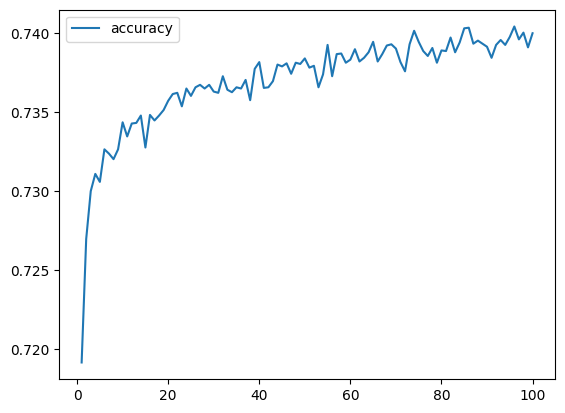

In [56]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [57]:
# Export our model to HDF5 file
filepath = r"\Users\elenamaksimova@Elenas-Air\Desktop\deep-learning-challenge\AlphabetSoupCharity.h5"
nn.save(filepath, save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


RESULTS:

This is Attempt #1
APPLICATION_TYPE cutoff = 500
CLASSIFICATION cutoff = 1883
layer1 = 80 : activation function = relu
layer2 = 30 : activation function = relu

Loss: 0.56, Accuracy: 0.7297959327697754

A loss value of 56,55% indicates that the model can be further optimized.
The accuracy percent shows that 72,979% of the model's predicted values align with the true values in the original dataset.

I need to make some changes in order to get to 75% accuracy.